In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
np.warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('film_visuals.csv')
data=data.drop('Unnamed: 0',axis=1)
data=data.reset_index(drop=True)
data.head()

,director_name,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres_x,actor_1_name,cast_total_facebook_likes,actor_3_name,plot_keywords,country,content_rating,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,budget_y,revenue,title,result
0,James Cameron,0.0,855.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,4834,Wes Studi,avatar|future|marine|native|paraplegic,USA,PG-13,2009.0,936.0,7.9,33000,237000000,2.787965e+09,Avatar,11.763566
1,Gore Verbinski,563.0,1000.0,Orlando Bloom,40000.0,Action|Adventure|Fantasy,Johnny Depp,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,USA,PG-13,2007.0,5000.0,7.1,0,300000000,9.610000e+08,Pirates of the Caribbean: At World's End,3.203333
2,Sam Mendes,0.0,161.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,UK,PG-13,2015.0,393.0,6.8,85000,245000000,8.806746e+08,Spectre,3.594590
3,Christopher Nolan,22000.0,23000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,USA,PG-13,2012.0,23000.0,8.5,164000,250000000,1.084939e+09,The Dark Knight Rises,4.339756
4,Andrew Stanton,475.0,530.0,Samantha Morton,640.0,Action|Adventure|Sci-Fi,Daryl Sabara,1873,Polly Walker,alien|american civil war|male nipple|mars|prin...,USA,PG-13,2012.0,632.0,6.6,24000,260000000,2.841391e+08,John Carter,1.092843


In [3]:
data.columns

Index(['director_name', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'genres_x', 'actor_1_name',
       'cast_total_facebook_likes', 'actor_3_name', 'plot_keywords', 'country',
       'content_rating', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'budget_y', 'revenue', 'title', 'result'],
      dtype='object')

In [4]:
data.plot_keywords=data.plot_keywords.str.replace('|',' ')

In [7]:
data=data[data.plot_keywords.notnull()]

In [8]:
words=data.groupby('director_name')['plot_keywords'].apply(' '.join).reset_index()

__Wordclouds of plot keywords per director:__

In [12]:
directors=data.director_name.value_counts().reset_index()

In [14]:
directors.columns=['director','films']

In [15]:
directors_list=directors.director.tolist()

In [11]:
words.plot_keywords[words.director_name=='Woody Allen'].values
#example of plot keywords for all Woody Allen films in the dataset

array(["1920s golden age midnight paris france time travel romance efficiency expert insurance investigator magician scorpion thief architect celebrity prostitute shower tourist actress bodyguard new york city play playwright marriage novelist panties pulled down writer's block writing engagement grandfather liberal maid song congenital liar mental breakdown self deception snob talking to oneself apartment building crook new york city three word title written and directed by cast member love at first sight new york city sex teacher writer art artist painter sex summer beach cigarette girl radio woman holding a baby working class blind director psychosomatic blindness self deprecating studio extramarital affair infidelity irony of fate surprise ending tennis 12 year old artist hotel three word title written and directed by cast member atheist limp quantum mechanics religion runaway call girl charlatan fortune teller manuscript writer celebrity journalist lesbian kiss strong female chara

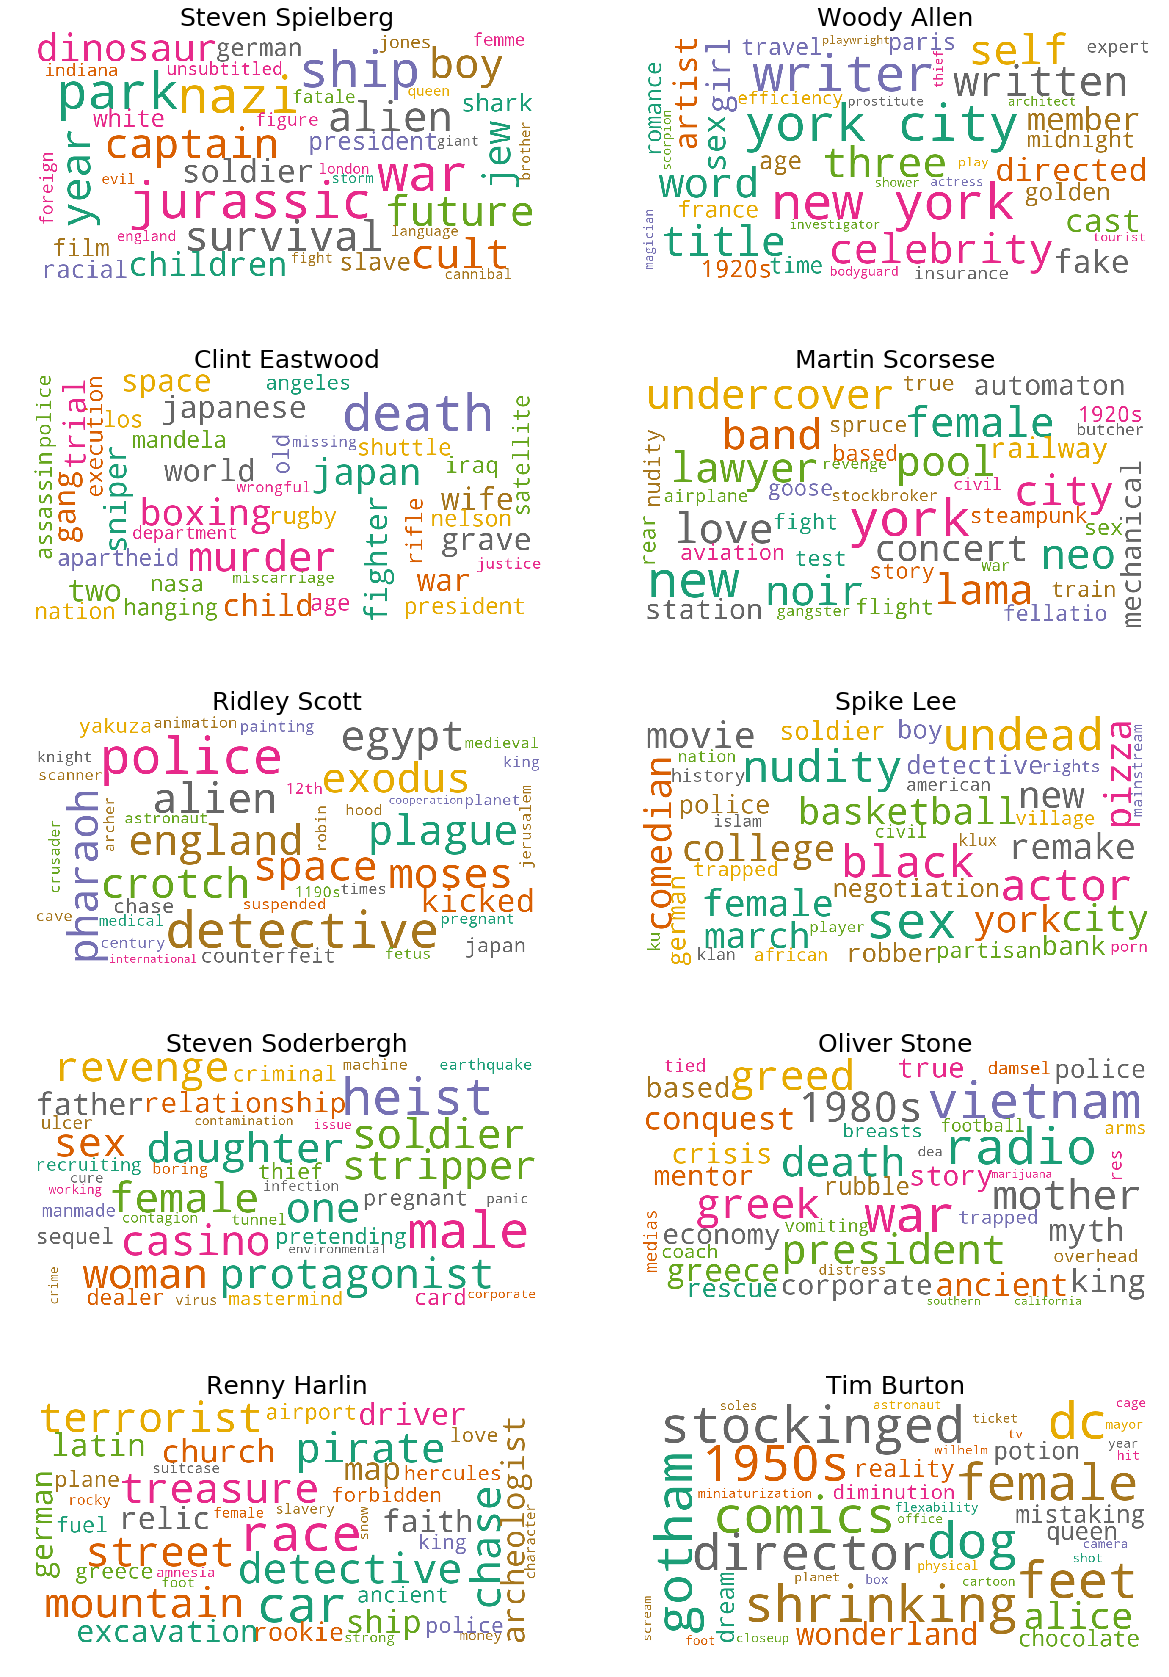

In [20]:
stopwords = set(STOPWORDS)

text=0

def show_wordcloud(text, title = None):

    for i in range(10):
        
        index=words.index[words['director_name']==directors_list[i]][0]
        text =words['plot_keywords'].loc[index]

        wordcloud = WordCloud(
            background_color='white',
            stopwords=stopwords,
            max_words=40,
            max_font_size=40, 
            scale=3,
            random_state=1,
            colormap='Dark2'
            
        ).generate(str(text))

        fig = plt.figure(1, figsize=(20, 30))
        fig.add_subplot(5,2,i+1).set_title(directors_list[i],fontsize=25)
        fig.subplots_adjust(hspace=0.3)

        plt.axis('off')

        plt.imshow(wordcloud)
    plt.show()

show_wordcloud(text)

__Wordclouds of plot keywords per genre:__

In [21]:
words1=data.groupby('genres_x')['plot_keywords'].apply(' '.join).reset_index()

In [22]:
genres=data.genres_x.value_counts().reset_index()

In [23]:
genres.columns=['genres','keywords']

In [24]:
genres_list=genres.genres.tolist()

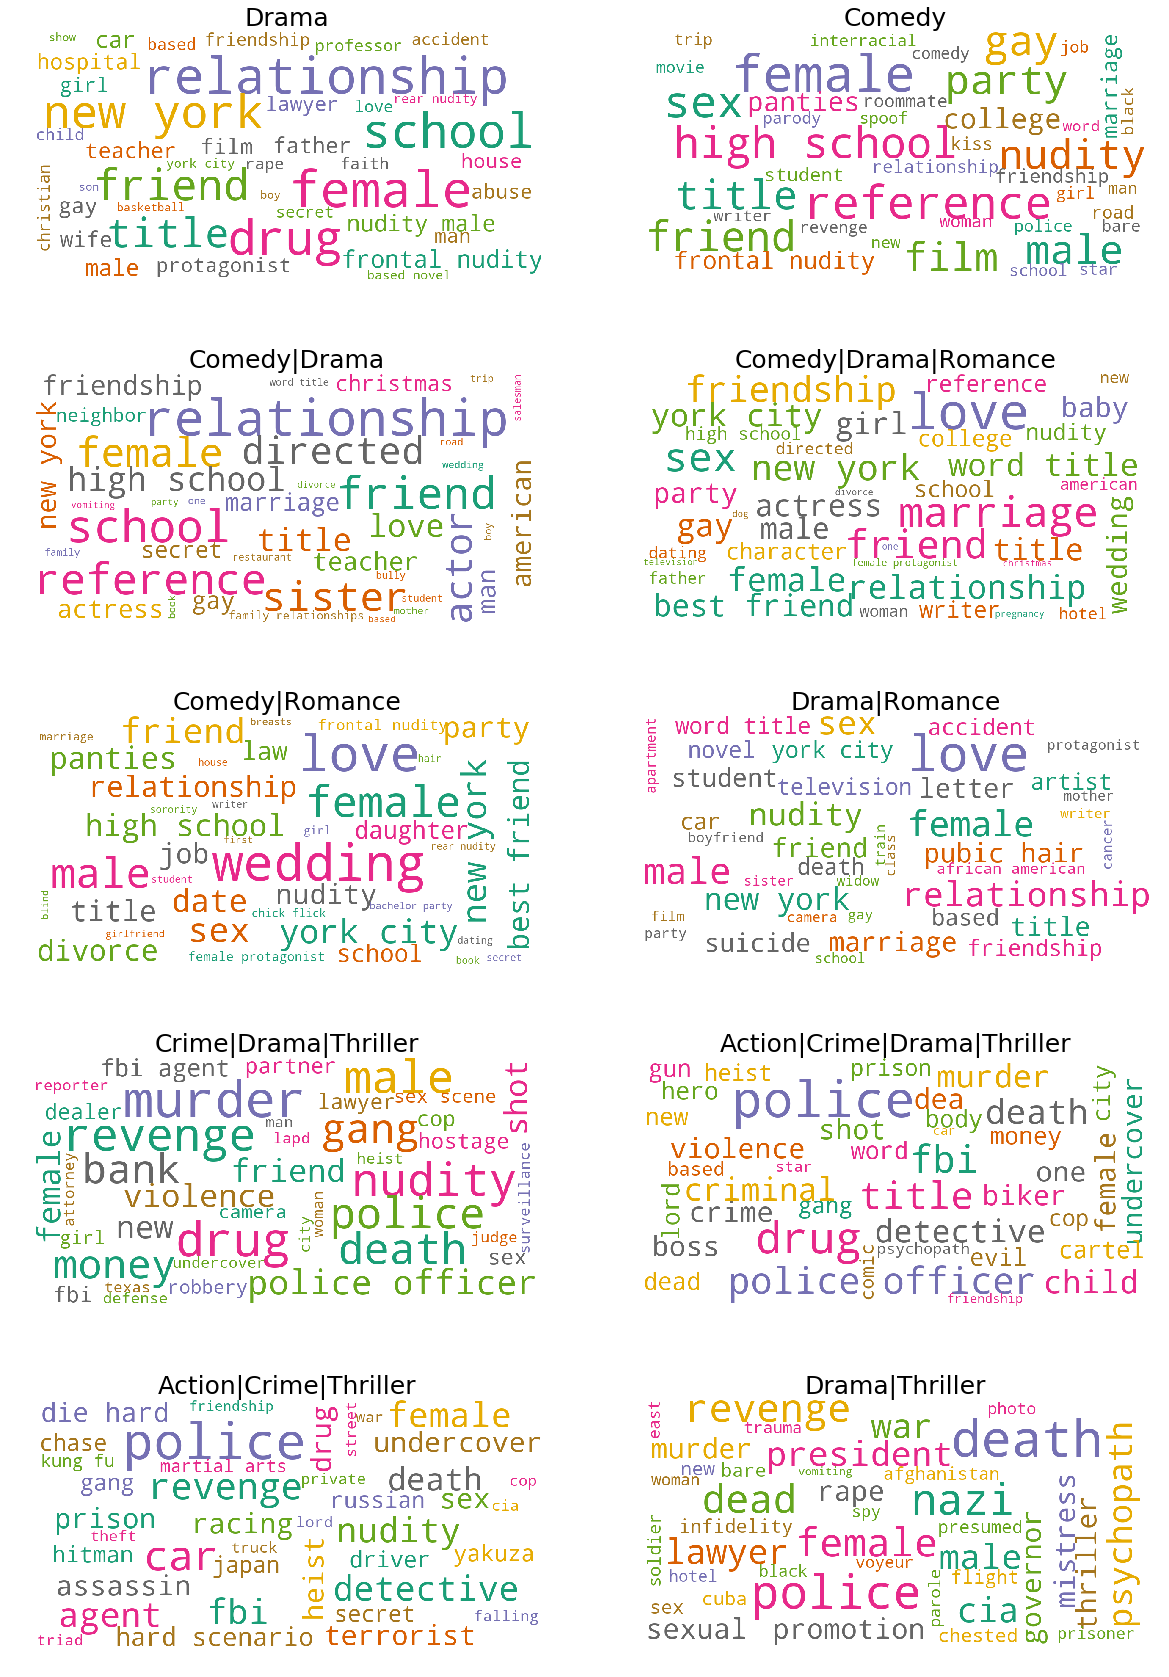

In [28]:
stopwords = set(STOPWORDS)

text=0

def show_wordcloud(text, title = None):

    for i in range(10):
        
        index=words1.index[words1['genres_x']==genres_list[i]][0]
        text =words1['plot_keywords'].loc[index]

        wordcloud = WordCloud(
            background_color='white',
            stopwords=stopwords,
            max_words=40,
            max_font_size=40, 
            scale=3,
            random_state=1,
            colormap='Dark2'
            
        ).generate(str(text))

        fig = plt.figure(1, figsize=(20, 30))
        fig.add_subplot(5,2,i+1).set_title(genres_list[i],fontsize=25)
        fig.subplots_adjust(hspace=0.3)

        plt.axis('off')

        plt.imshow(wordcloud)
    plt.show()

show_wordcloud(text)

__Wordcloud for top 30 box office films:__

In [29]:
data=data.sort_values(by='revenue',ascending=False).reset_index()

In [30]:
data1=data.head(30)

In [32]:
text1=data1.plot_keywords.str.cat()

In [34]:
plt.figure?

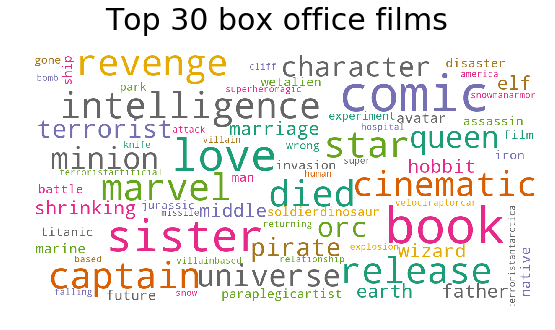

In [44]:
wordcloud = WordCloud(
            background_color='white',
            stopwords=stopwords,
            max_words=70,
            max_font_size=40, 
            scale=3,
            random_state=1,
            colormap='Dark2'
            
        ).generate(str(text1))
fig = plt.figure(figsize=(9,9))
fig.suptitle('Top 30 box office films',fontsize=30,y=0.77)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

__Bottom 30 box office films:__

In [45]:
data2=data.tail(30)

In [49]:
text2=data2.plot_keywords.str.cat()

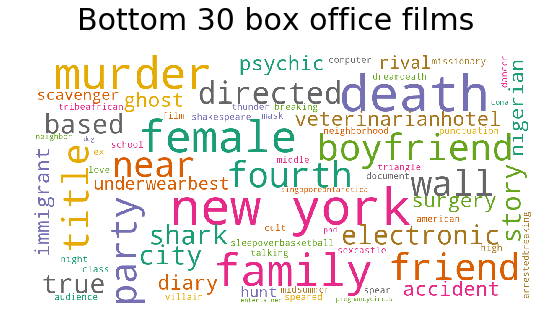

In [50]:
wordcloud = WordCloud(
            background_color='white',
            stopwords=stopwords,
            max_words=70,
            max_font_size=40, 
            scale=3,
            random_state=1,
            colormap='Dark2'
            
        ).generate(str(text2))
fig = plt.figure(figsize=(9,9))
fig.suptitle('Bottom 30 box office films',fontsize=30,y=0.77)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()